In [36]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from atooms.trajectory import Trajectory
import atooms.postprocessing as pp
from  atooms.postprocessing import api

from datetime import datetime

In [37]:
# trajectory_filename = 'trajectory.xyz'
trajectory_filename = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    '2021-02-15',
    'T_2.80453_dt_0.005.xyz'
)


trajectory_filename

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-02-15\\T_2.80453_dt_0.005.xyz'

In [38]:
trajectory = Trajectory(trajectory_filename)

In [24]:
k_kwargs = {
    'kmin': 0,
    'kmax': 20,
    'ksamples': 1000,
}

In [25]:
def get_grid_and_values(trajectory_filename, parameter):
    grid, values = [], []
    with open(f'{trajectory_filename}.pp.{parameter}') as file:
        for line in file:
            if line.startswith('#'):
                continue
            row = [float(_) for _ in line.rstrip().split()]
            grid.append(row[0])
            values.append(row[1])
    return grid, values

#### Функция радиального распределения (300 шагов за 40 секунд без дополнительных настроек, dr=0.01)

0:01:22.221392


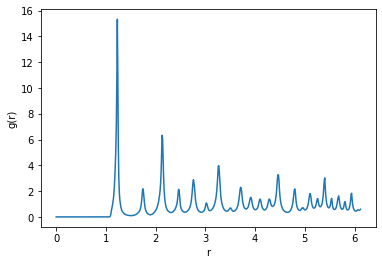

In [26]:
start = datetime.now()

rdf = pp.RadialDistributionFunction(
    trajectory, 
    dr=0.01
)
rdf.do()
plt.plot(rdf.grid, rdf.value)
plt.xlabel("r");
plt.ylabel("g(r)");
print(datetime.now() - start)

#### Статический структурный фактор (300 шагов за 5.5 минут для 1000 значений k от 0 до 20)

0:39:35.832522


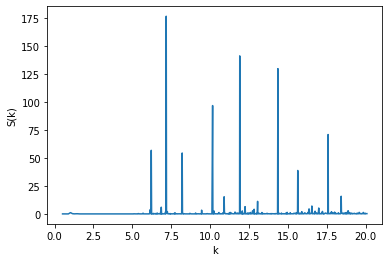

In [27]:
start = datetime.now()

ssf = pp.StructureFactor(
    trajectory,
    **k_kwargs,
)
ssf.do()
plt.plot(ssf.grid, ssf.value)
plt.xlabel("k");
plt.ylabel("S(k)");

print(datetime.now() - start)

#### Среднеквадратичное смещение (300 шагов за 14 секунд)

0:02:26.728566


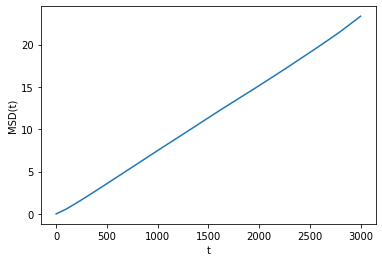

In [39]:
start = datetime.now()

msd = pp.MeanSquareDisplacement(trajectory)
msd.do()
plt.plot(
    msd.grid, 
    msd.value, 
)
plt.xlabel("t");
plt.ylabel("MSD(t)");

print(datetime.now() - start)

#### Диффузия Эйнштейна

0:00:00.025955


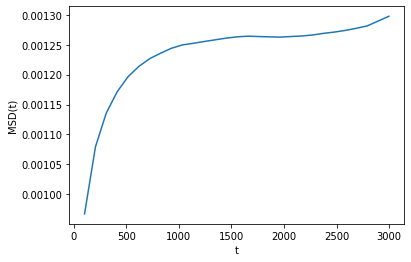

In [40]:
start = datetime.now()

msd_grid = np.array(msd.grid[1:])
msd_value = np.array(msd.value[1:])

plt.plot(
    msd_grid, 
    msd_value / 6 / msd_grid, 
)
plt.xlabel("t");
plt.ylabel("MSD(t)");

print(datetime.now() - start)

#### CollectiveOverlap (300 шагов за 9 минут)

1:23:49.728063


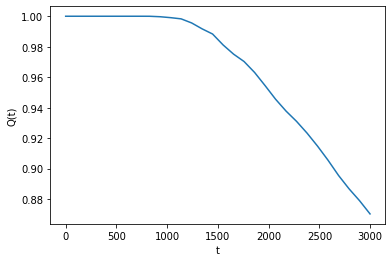

In [30]:
start = datetime.now()

co = pp.CollectiveOverlap(
    trajectory, 
    tgrid=msd.grid,
)
co.do()
plt.plot(co.grid, co.value)
plt.xlabel(r"t");
plt.ylabel(r"Q(t)");

print(datetime.now() - start)

#### Спектральная плотность (300 шагов за 3 минуты для 1000 значений k от 0 до 20)

In [31]:
start = datetime.now()

api.ik(
    trajectory_filename,
    **k_kwargs,
)
ik_grid, ik_value = get_grid_and_values(trajectory_filename, 'ik')
print(datetime.now() - start)

0:04:18.258494


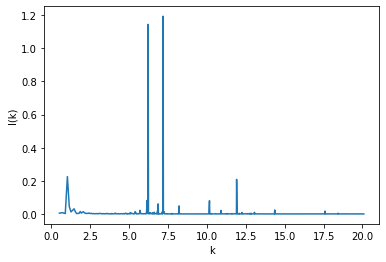

In [32]:
plt.plot(ik_grid, ik_value);
plt.xlabel(r"k");
plt.ylabel(r"I(k)");

#### Автокорреляционная функция скорости (300 шагов за 9 минут)

In [34]:
start = datetime.now()

api.vacf(
    trajectory_filename,
#     tmax=-1, 
#     tmax_fraction=0.10,
#     tsamples=300,
)
vacf_grid, vacf_value = get_grid_and_values(trajectory_filename, 'vacf')
print(datetime.now() - start)

0:00:54.744572


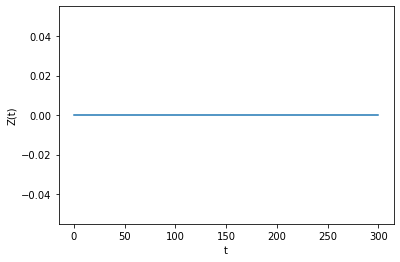

In [35]:
plt.plot(vacf_grid, vacf_value);
plt.xlabel(r"t");
plt.ylabel(r"Z(t)");